<a href="https://colab.research.google.com/github/jaaaamj0711/kaggle_study/blob/master/Bank%20Marketing/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/bank.csv")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


# EDA

## Categorical Variable

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

plt.style.use('seaborn-whitegrid')

In [ ]:
def bar_plot(columns):
  col = data[columns].value_counts()
  plt.figure(figsize=(14, 5))
  sns.barplot(x=col.index, y=col)
  plt.xticks(rotation=45, fontsize=12)
  plt.yticks(fontsize=12)
  plt.ylabel(" ")
  plt.title(columns, fontsize=20)
  plt.show()

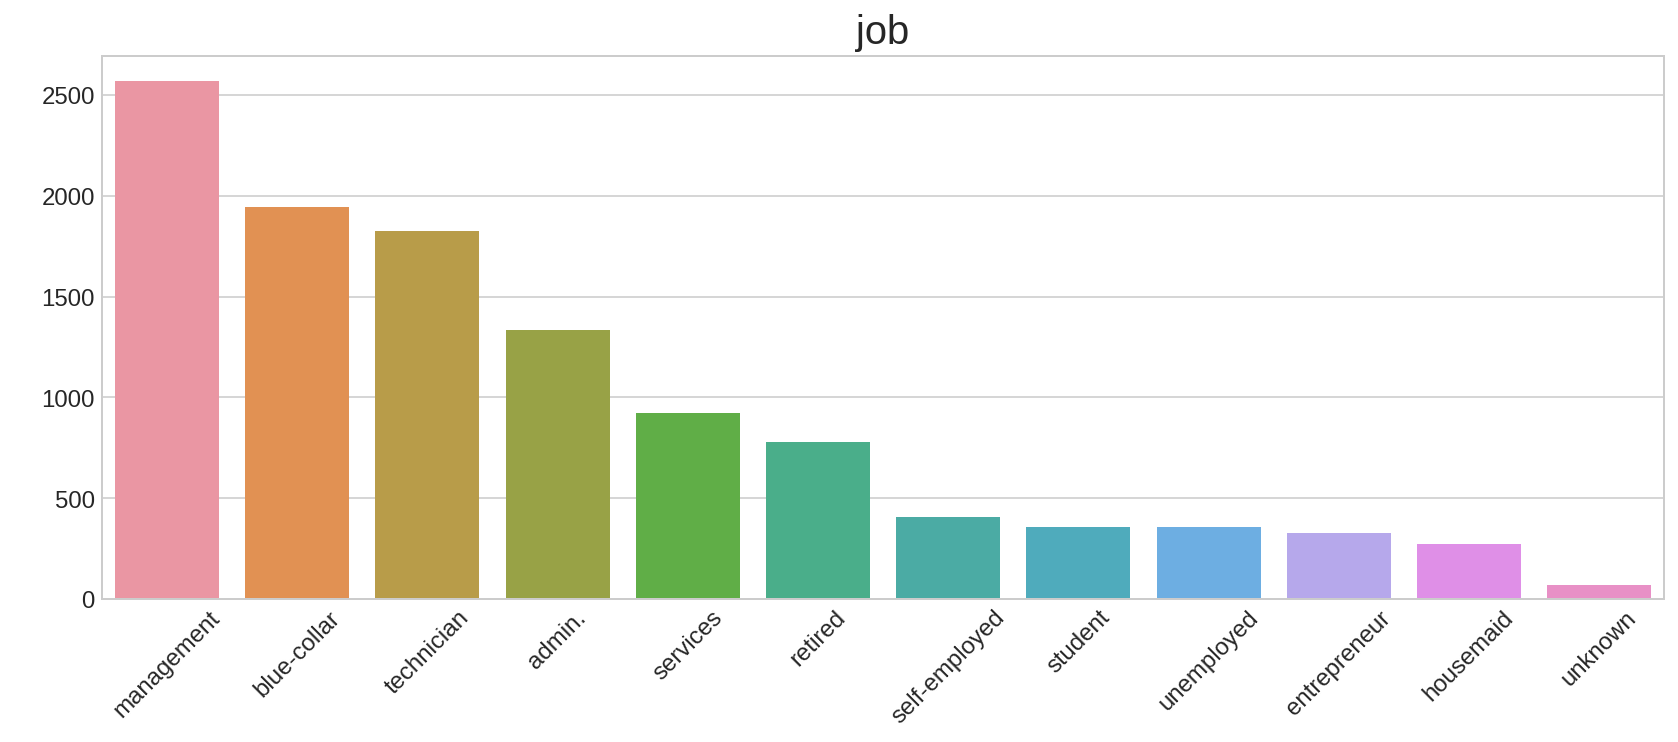

In [ ]:
bar_plot("job")

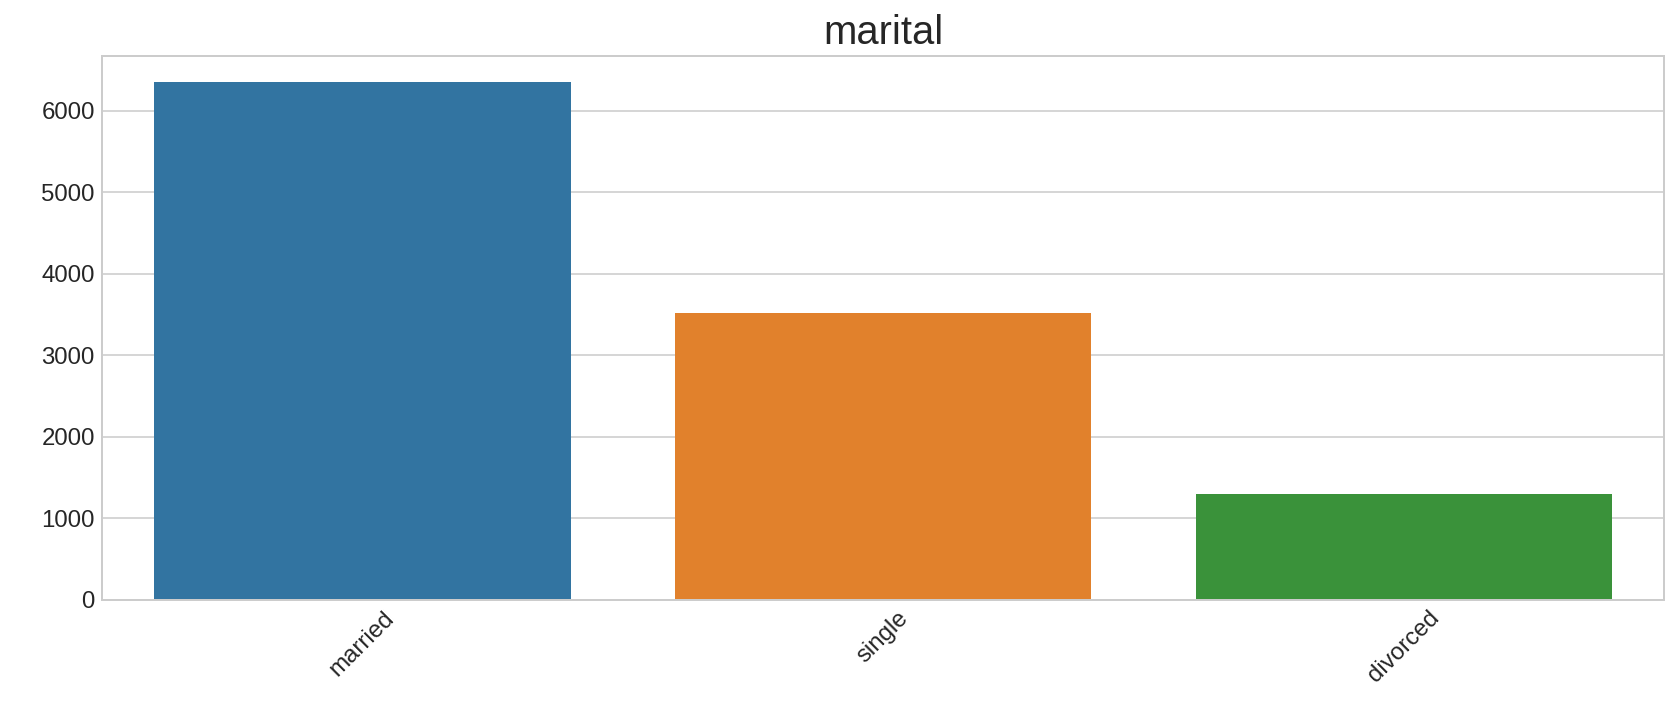

In [ ]:
bar_plot('marital')

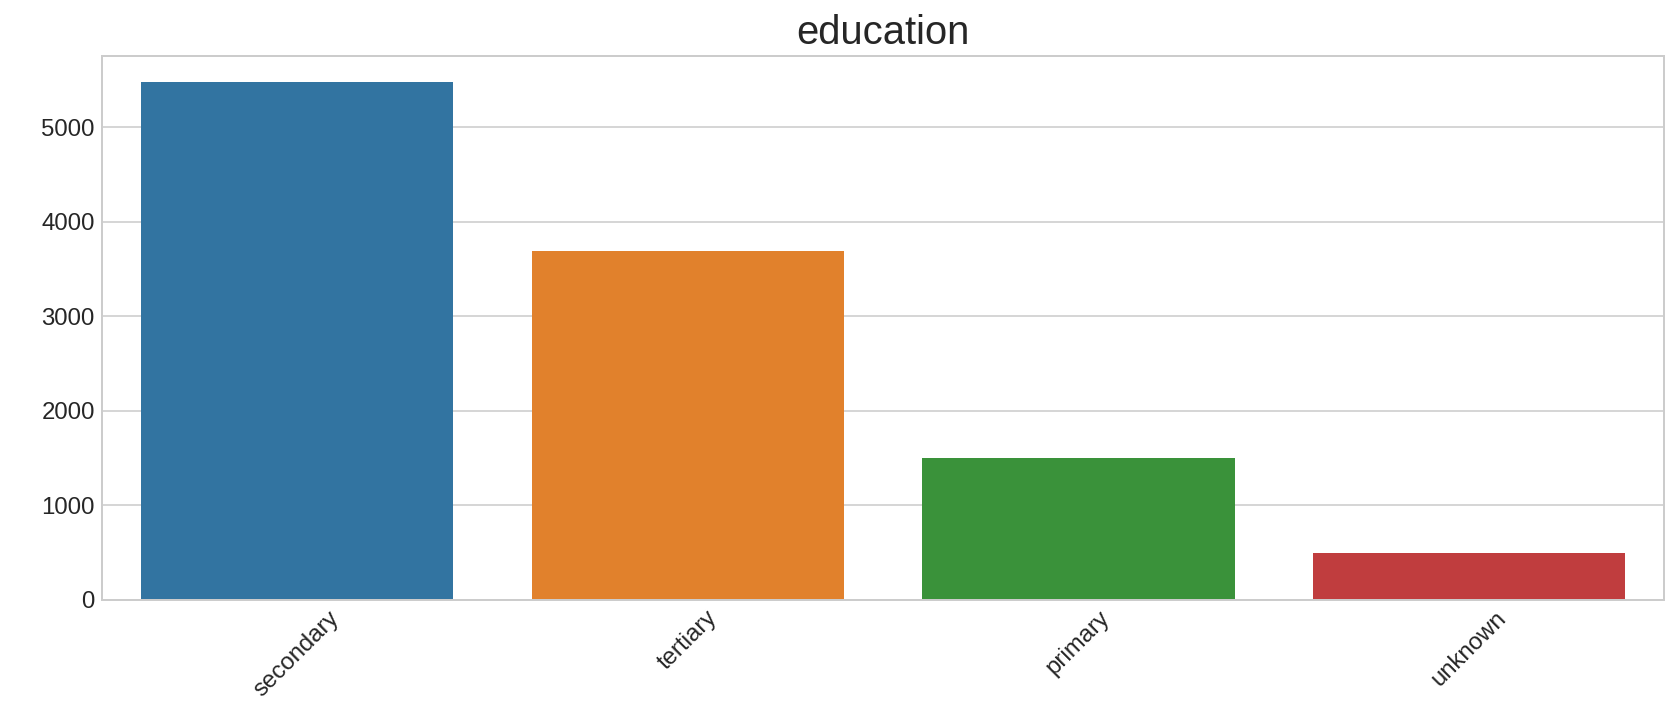

In [ ]:
bar_plot("education")

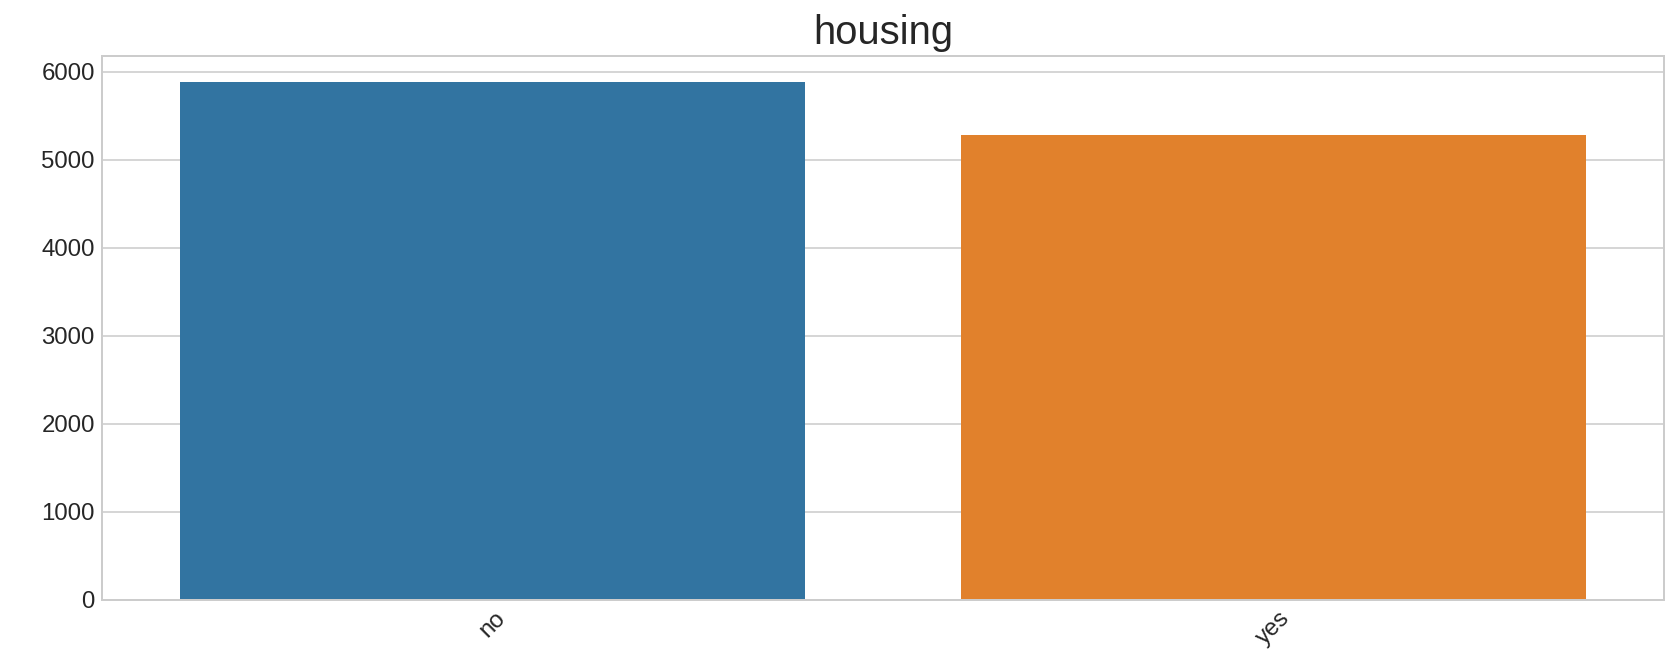

In [ ]:
bar_plot('housing')

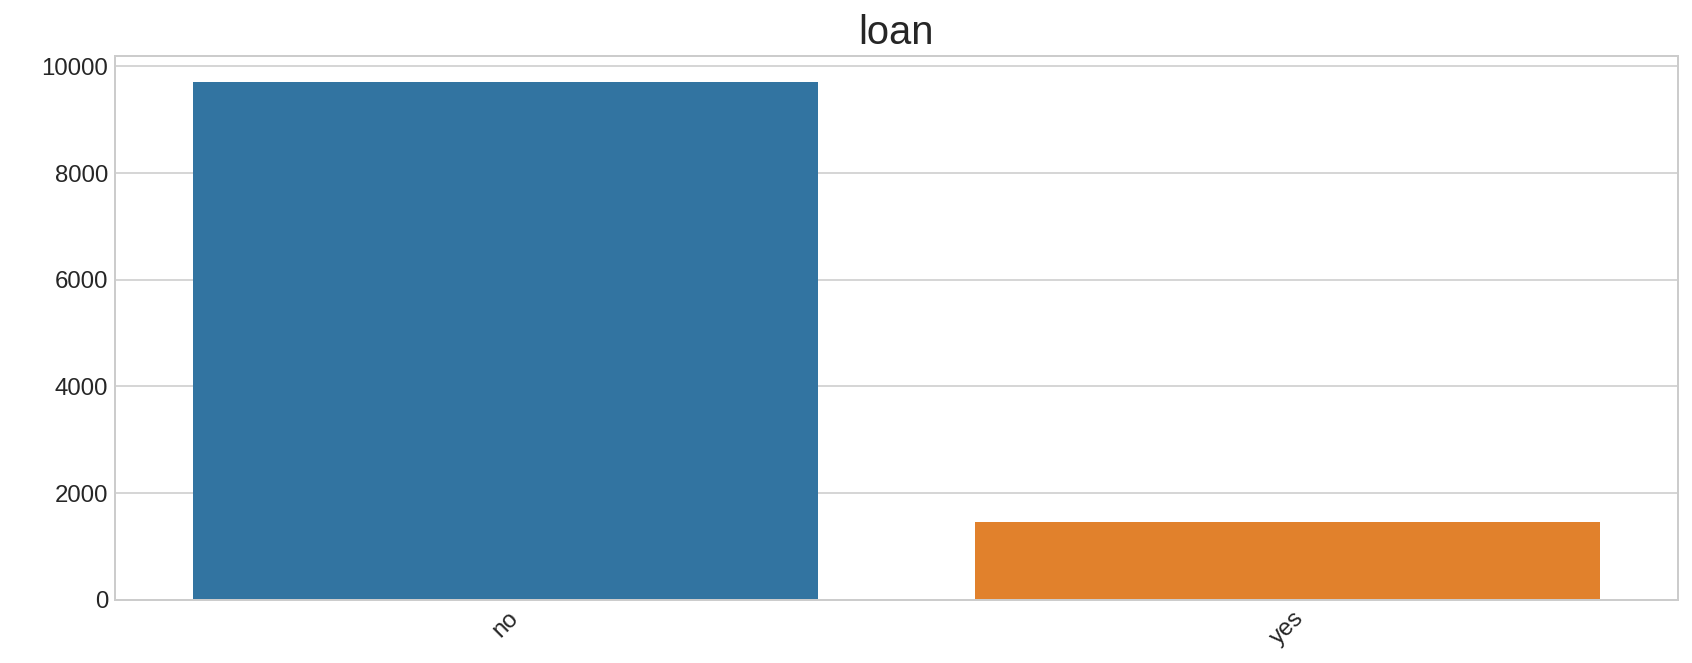

In [ ]:
bar_plot("loan")

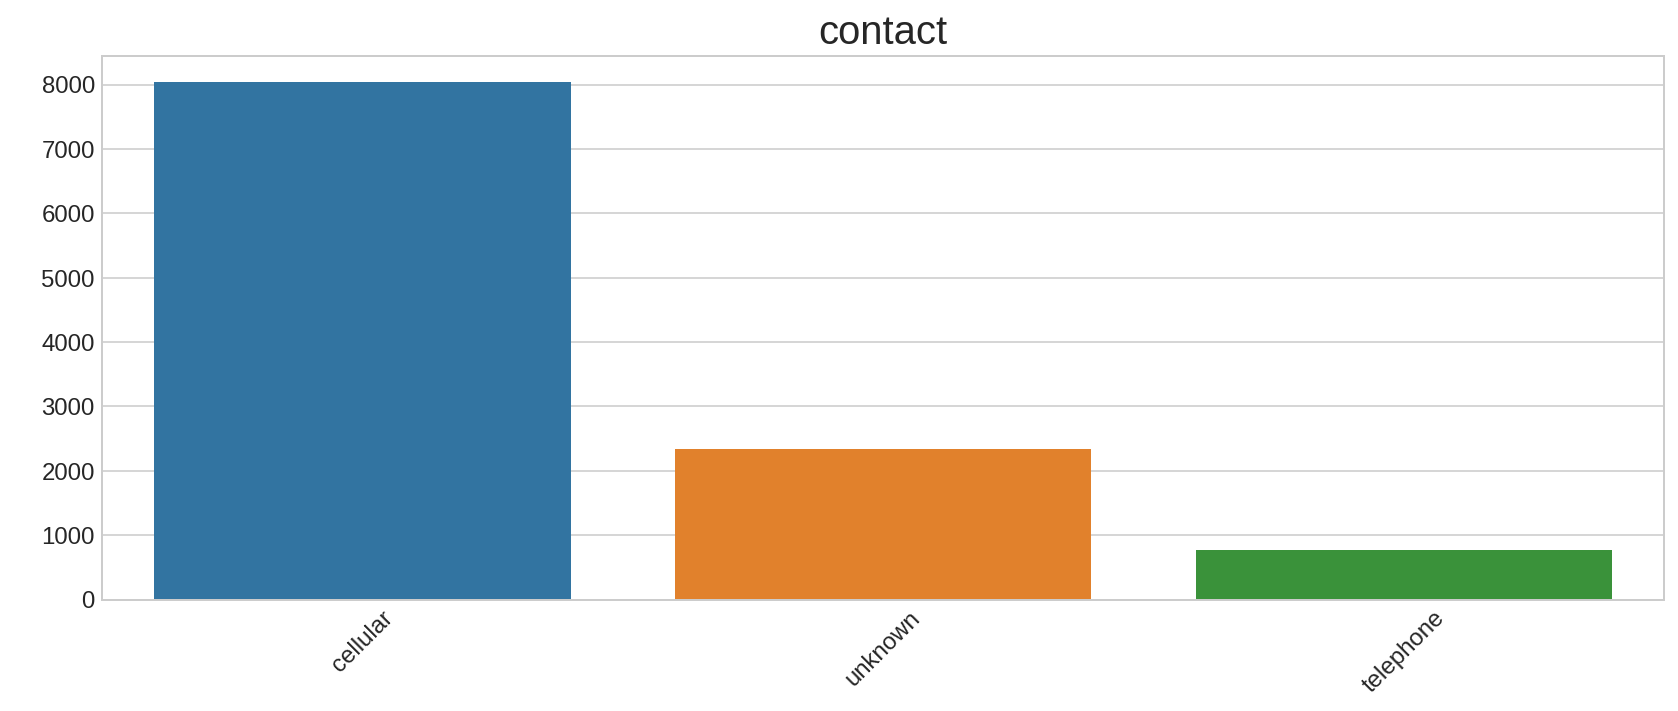

In [ ]:
bar_plot("contact")

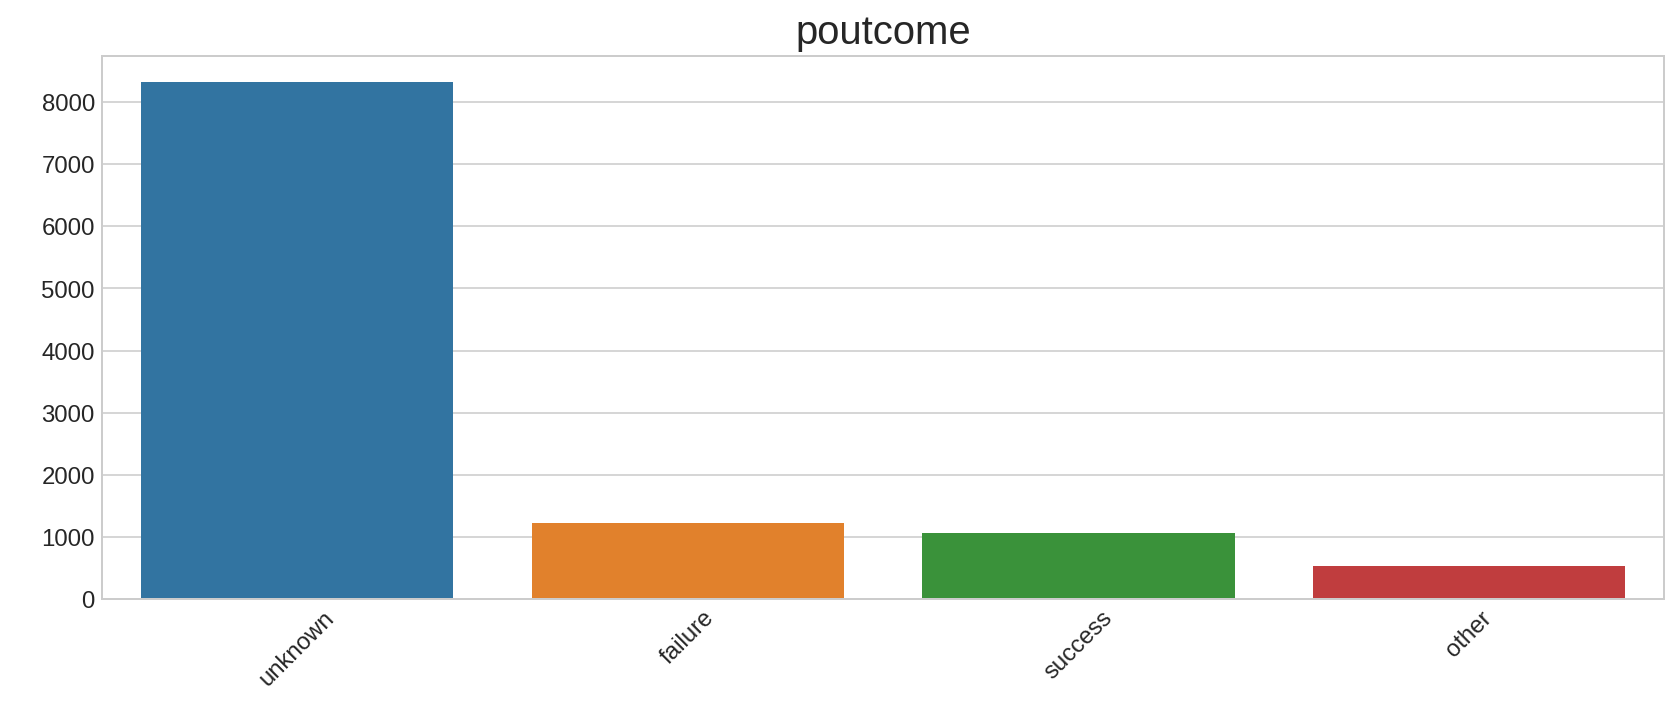

In [ ]:
bar_plot("poutcome")

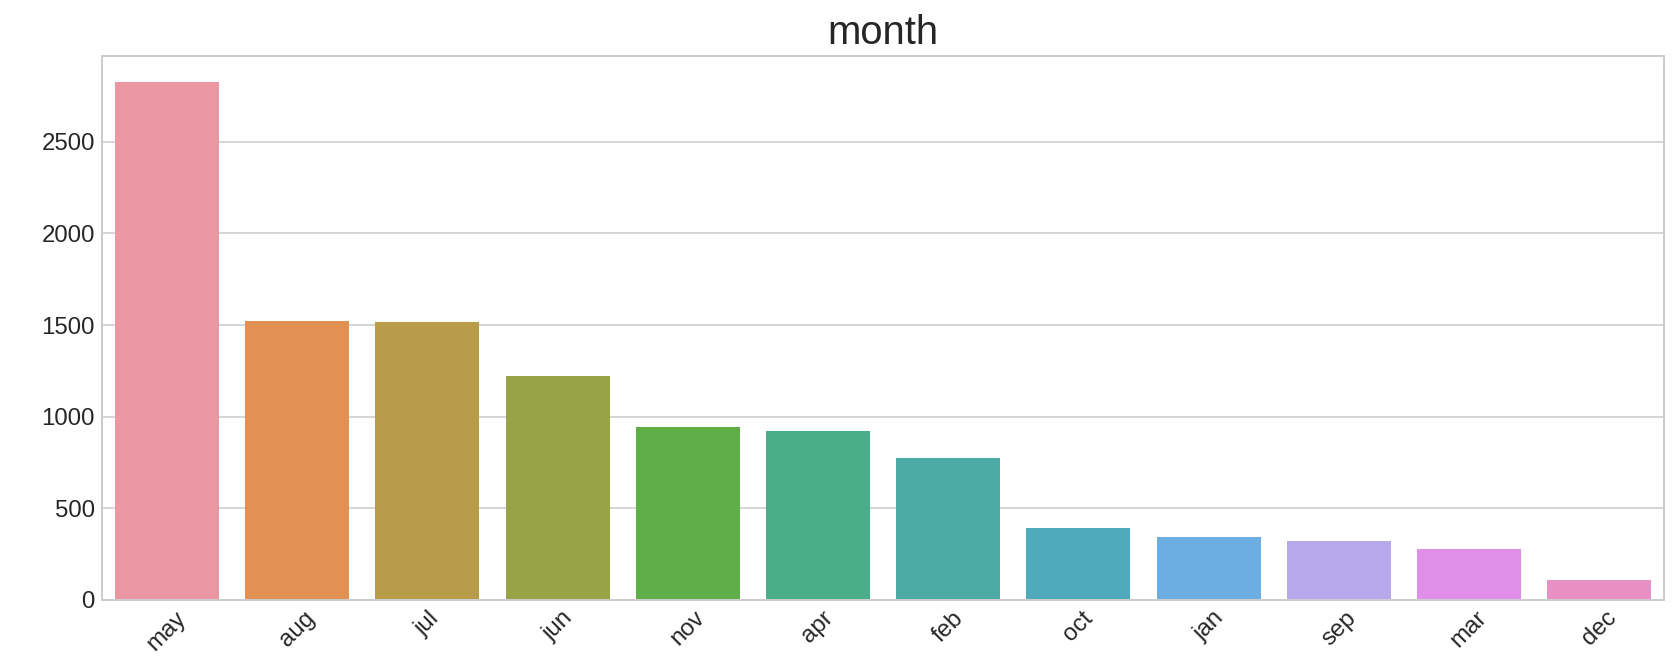

In [ ]:
bar_plot("month")

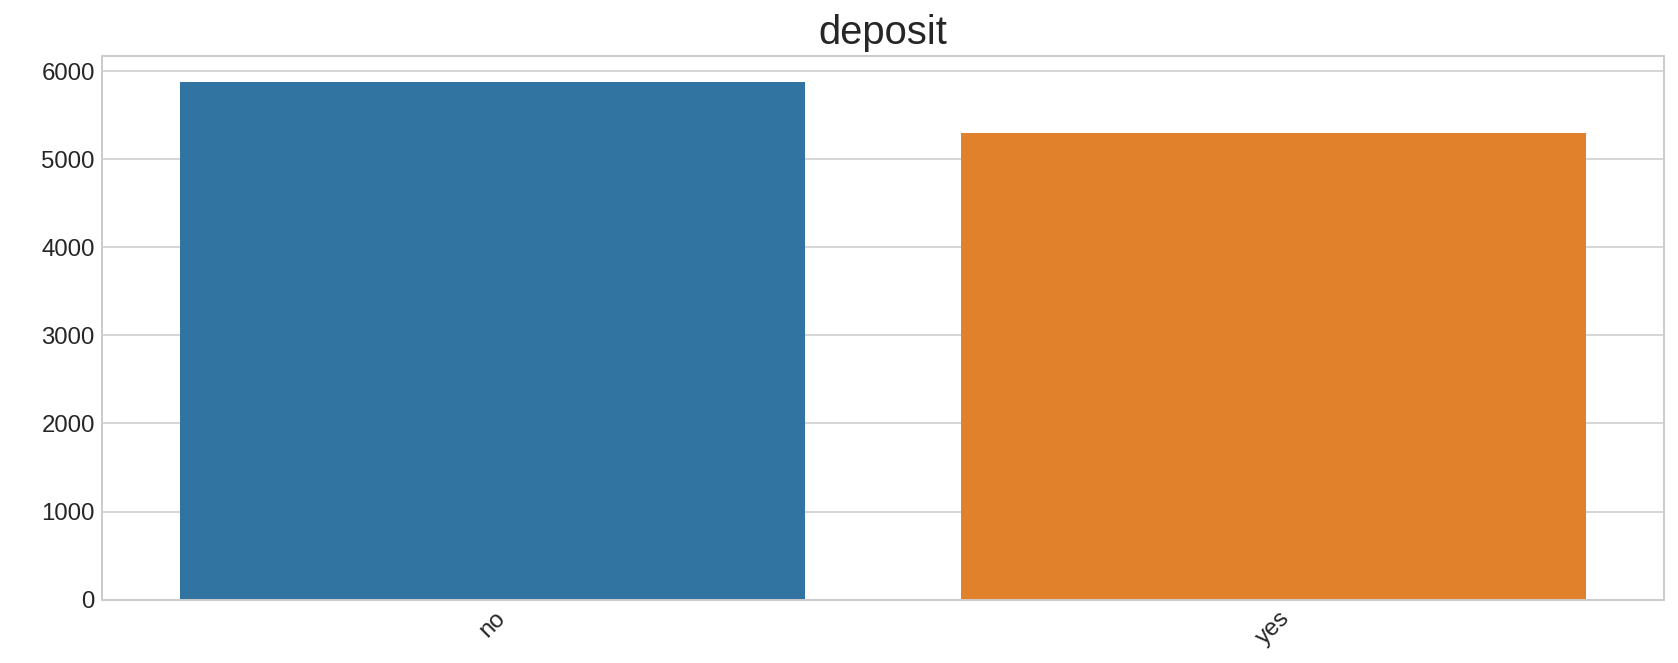

In [ ]:
bar_plot("deposit")

- 직업은 management를 직업으로 가지는 사람들이 가장 많습니다.
- 결혼 여부에서는 결혼을 한 사람들이 많습니다.
- 교육배경에서는 중고등수준이 가장 많습니다.
- 주택대출여부는 많은 차이는 없었지만 있는 사람들이 많습니다.
- 개인대출여부는 있는 사람들이 훨씬 많습니다.
- 통신유형에서는 무선 전화를 사용하는 사람들이 많습니다.
- 이전에 실행했던 마케팅 결과는 알수없는 사람들이 대부분입니다.
- 일년중 마지막으로 연락했던 달은 5월에서 가장 많습니다.
- 고객이 정기예금을 구독했는지 여부는 많은 차이는 없었지만 하지 않은 사람들이 조금 많았습니다.

## Numerical Variable

In [ ]:
def hist_plot(columns):
  plt.figure(figsize=(11, 5))
  sns.histplot(data[columns])
  plt.title(columns + " dist", fontsize=20)
  plt.show()

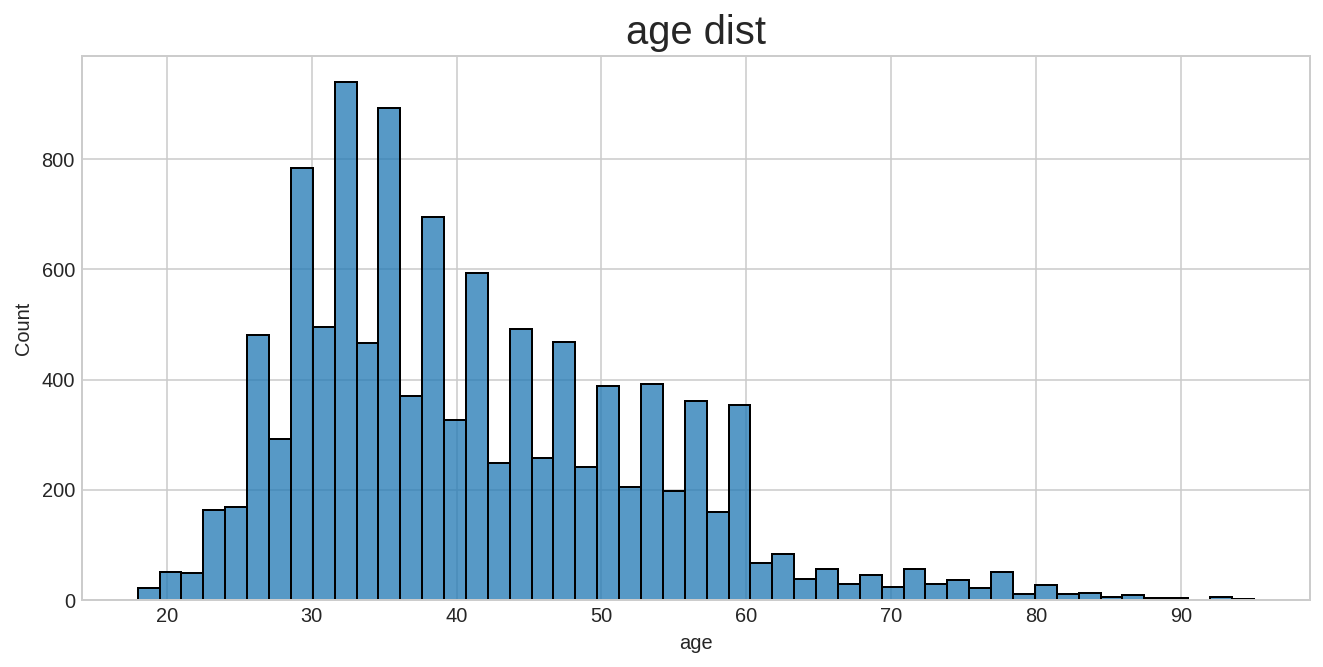

In [ ]:
hist_plot('age')

balance	day	duration	campaign	pdays	previous

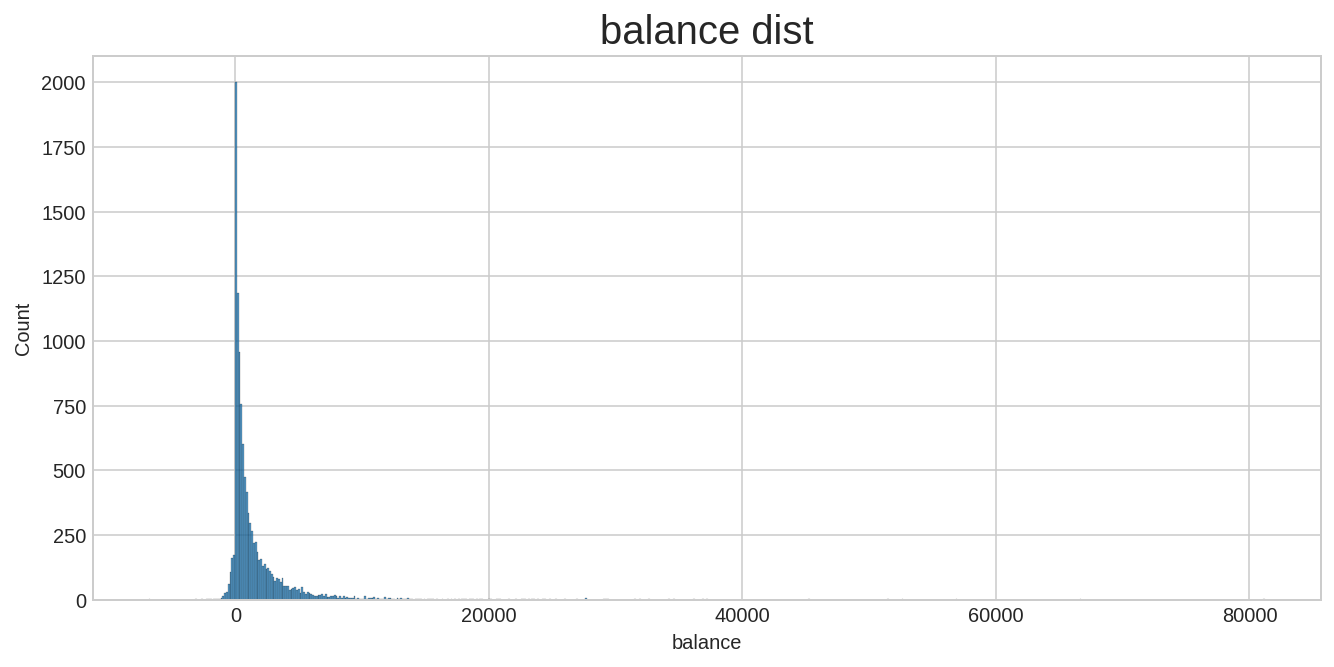

In [ ]:
hist_plot('balance')

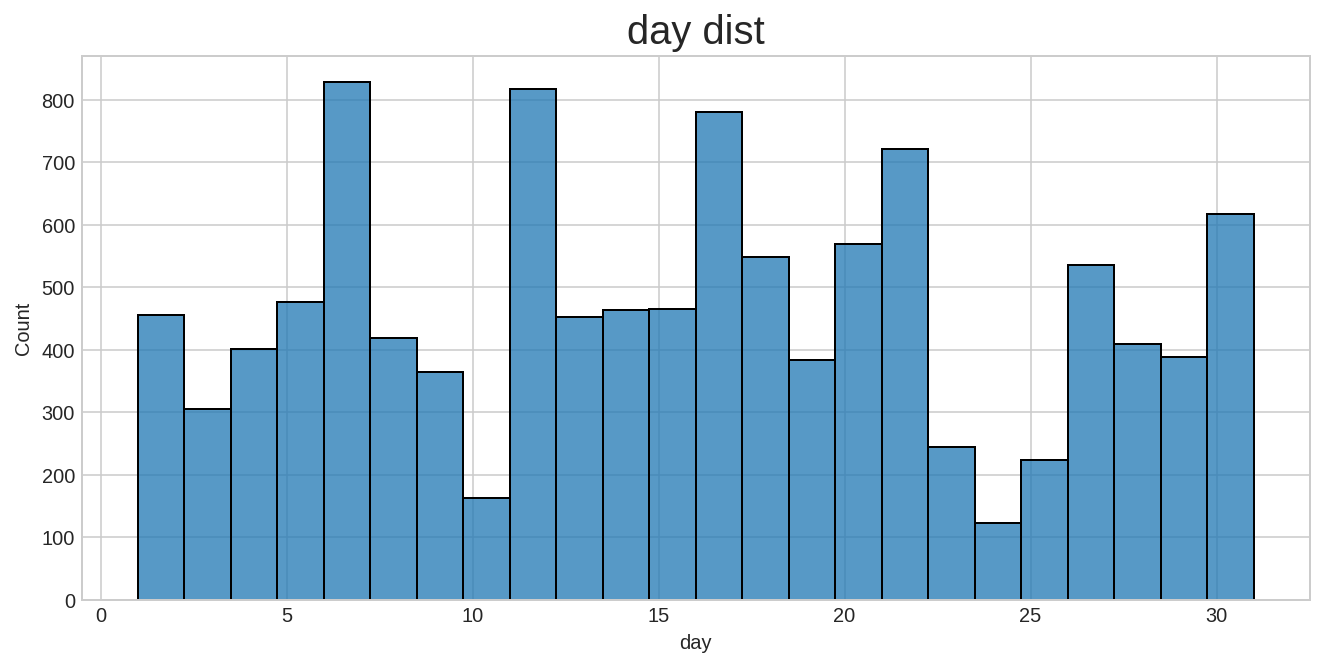

In [ ]:
hist_plot('day')

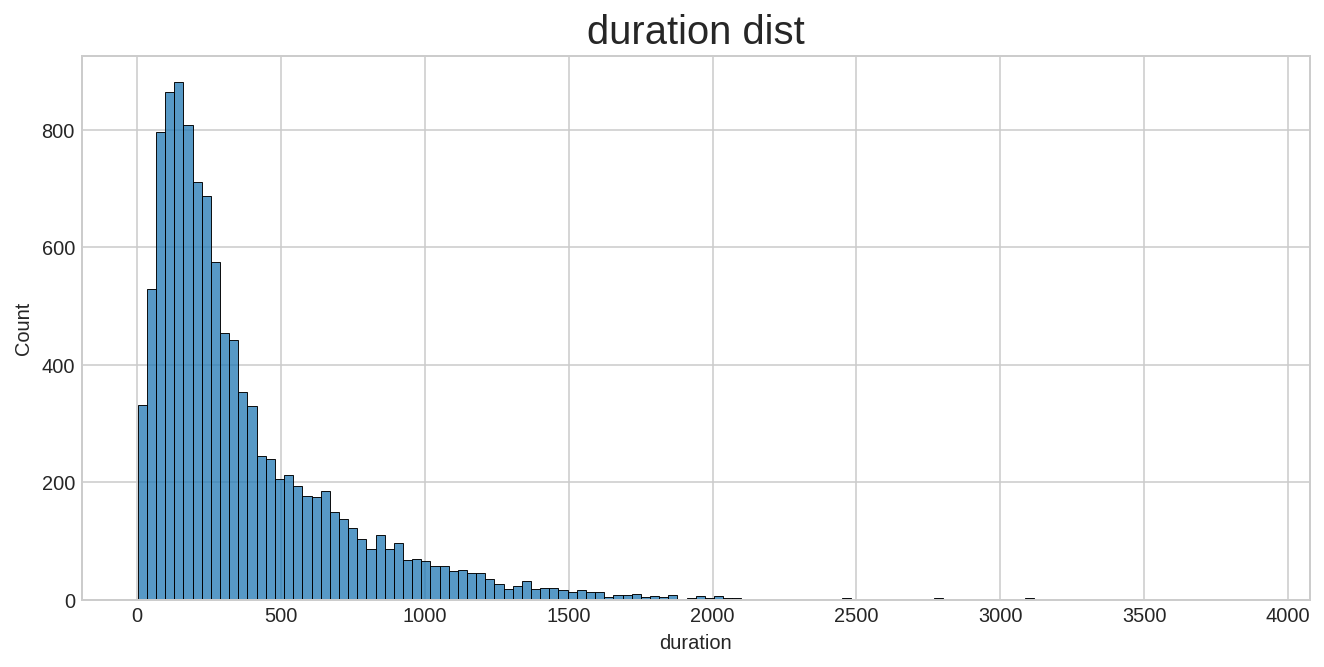

In [ ]:
hist_plot('duration')

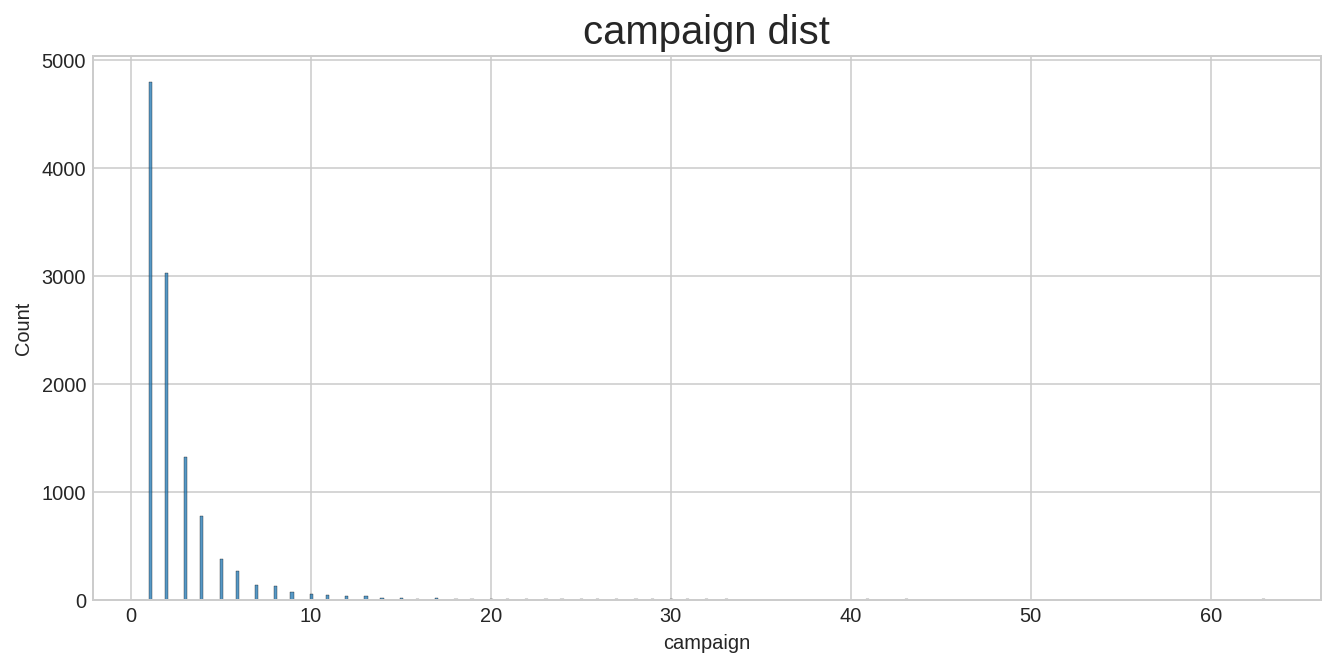

In [ ]:
hist_plot('campaign')

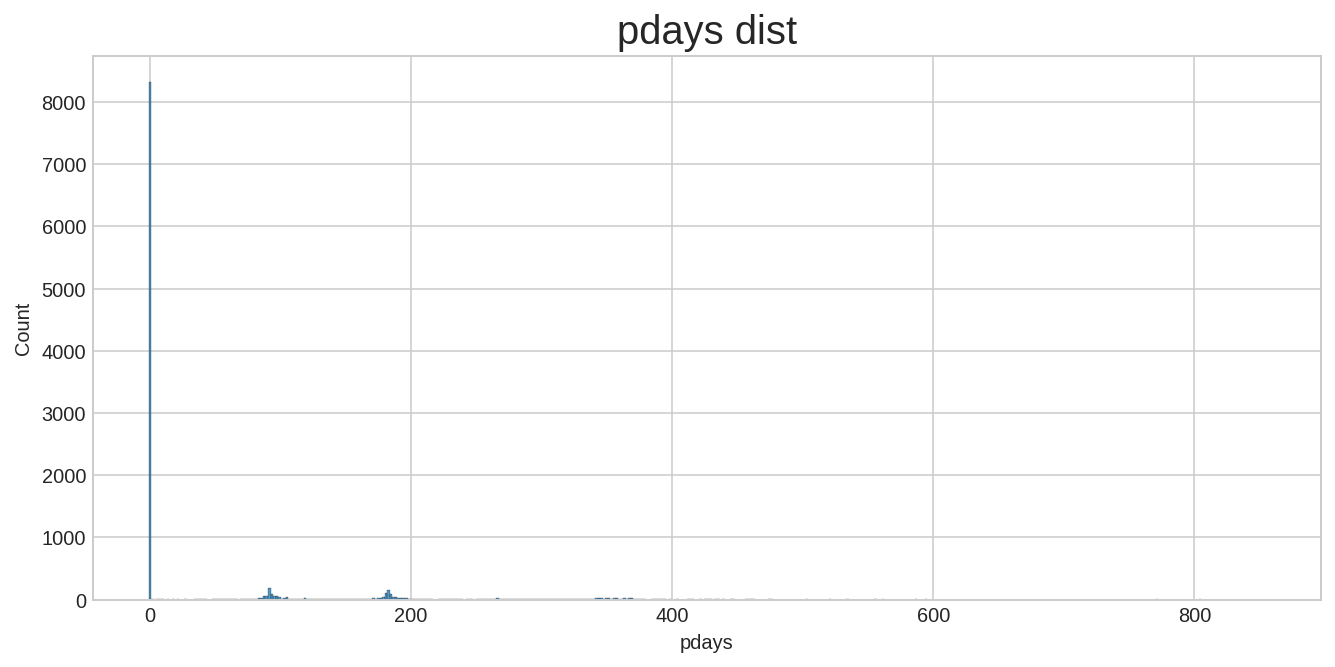

In [ ]:
hist_plot('pdays')

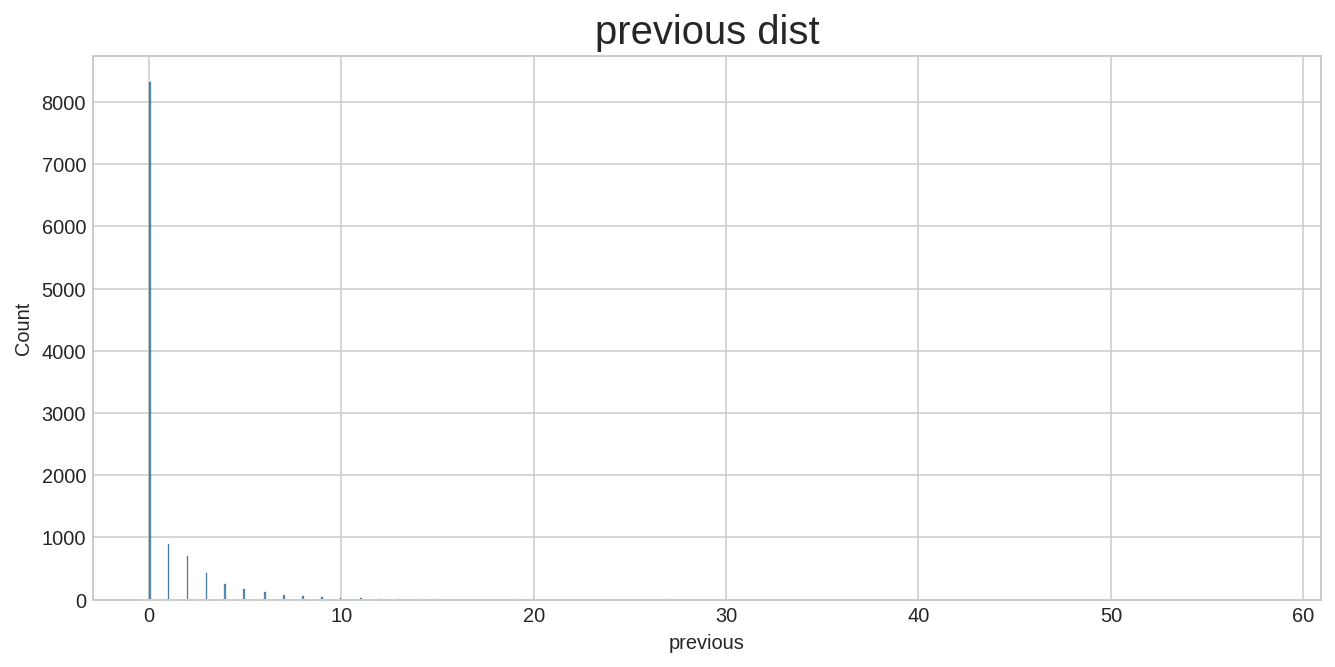

In [ ]:
hist_plot('previous')

- age와 day 변수는 고르게 분포되어 있지만 다른 변수들은 왼쪽으로 치우쳐 있는 경향이 있습니다. 이것으로 보아 이상치, 특이치가 존재하는것으로 보입니다.

# **Feature Engineering**

In [ ]:
data2 = data.copy()

In [ ]:
data2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
data2.groupby(['deposit','default']).size()

deposit  default
no       no         5757
         yes         116
yes      no         5237
         yes          52
dtype: int64

default와 타켓변수를 groupby함수로 살펴본결과 default변수와는 큰 의미가 없는 변수라고 생각이 듭니다. 따라서 feature 선택에서 제거하도록 하겠습니다.

In [ ]:
data2.drop(['default'],axis=1, inplace=True)

In [ ]:
data2.groupby(['deposit','pdays']).size()

deposit  pdays
no       -1       4940
          1          2
          2          6
          5          2
          6          2
                  ... 
yes       804        1
          805        1
          828        1
          842        1
          854        1
Length: 732, dtype: int64

pdays와 타켓변수를 groupby함수로 살펴본결과 EDA에서 살펴본 그래프 결과처럼 -1의 값이 상당히 많아 왼쪽으로 치우져 있는 문제점이 있습니다. 따라서 pdays변수도 제거하도록 하겠습니다.

In [ ]:
data2.drop(['pdays'],axis=1, inplace=True)

In [ ]:
data2.groupby('age',sort=True)['age'].count()

age
18     8
19    13
20    20
21    30
22    48
      ..
89     1
90     2
92     2
93     2
95     1
Name: age, Length: 76, dtype: int64

In [ ]:
data2.groupby(['deposit','balance'],sort=True)['balance'].count()

deposit  balance
no       -6847      1
         -2712      1
         -2282      1
         -2049      1
         -1965      1
                   ..
yes       34646     1
          36252     1
          45248     1
          52587     2
          81204     2
Name: balance, Length: 5082, dtype: int64

In [ ]:
data2.groupby(['deposit','duration'],sort=True)['duration'].count()

deposit  duration
no       2           1
         3           1
         4           2
         5           4
         6           6
                    ..
yes      3094        1
         3102        1
         3183        1
         3253        1
         3881        1
Name: duration, Length: 2157, dtype: int64